## **Practical No: 3 Time Series Forecasting**

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Dataset**

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/BigDataAnalytics/Practical3/tabular-playground-series-sep-2022.zip/train.csv")

test=pd.read_csv("/content/drive/MyDrive/BigDataAnalytics/Practical3/tabular-playground-series-sep-2022.zip/test.csv")

train.head(10)


,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
5,5,2017-01-01,Belgium,KaggleRama,Kaggle Getting Started,187
6,6,2017-01-01,Belgium,KaggleRama,Kaggle Recipe Book,158
7,7,2017-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,267
8,8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610
9,9,2017-01-01,France,KaggleMart,Kaggle Getting Started,463


In [ ]:
test.head(10)

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
5,70133,2021-01-01,Belgium,KaggleRama,Kaggle Getting Started
6,70134,2021-01-01,Belgium,KaggleRama,Kaggle Recipe Book
7,70135,2021-01-01,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose
8,70136,2021-01-01,France,KaggleMart,Kaggle Advanced Techniques
9,70137,2021-01-01,France,KaggleMart,Kaggle Getting Started


## **Data Visualization using time series of Sales**

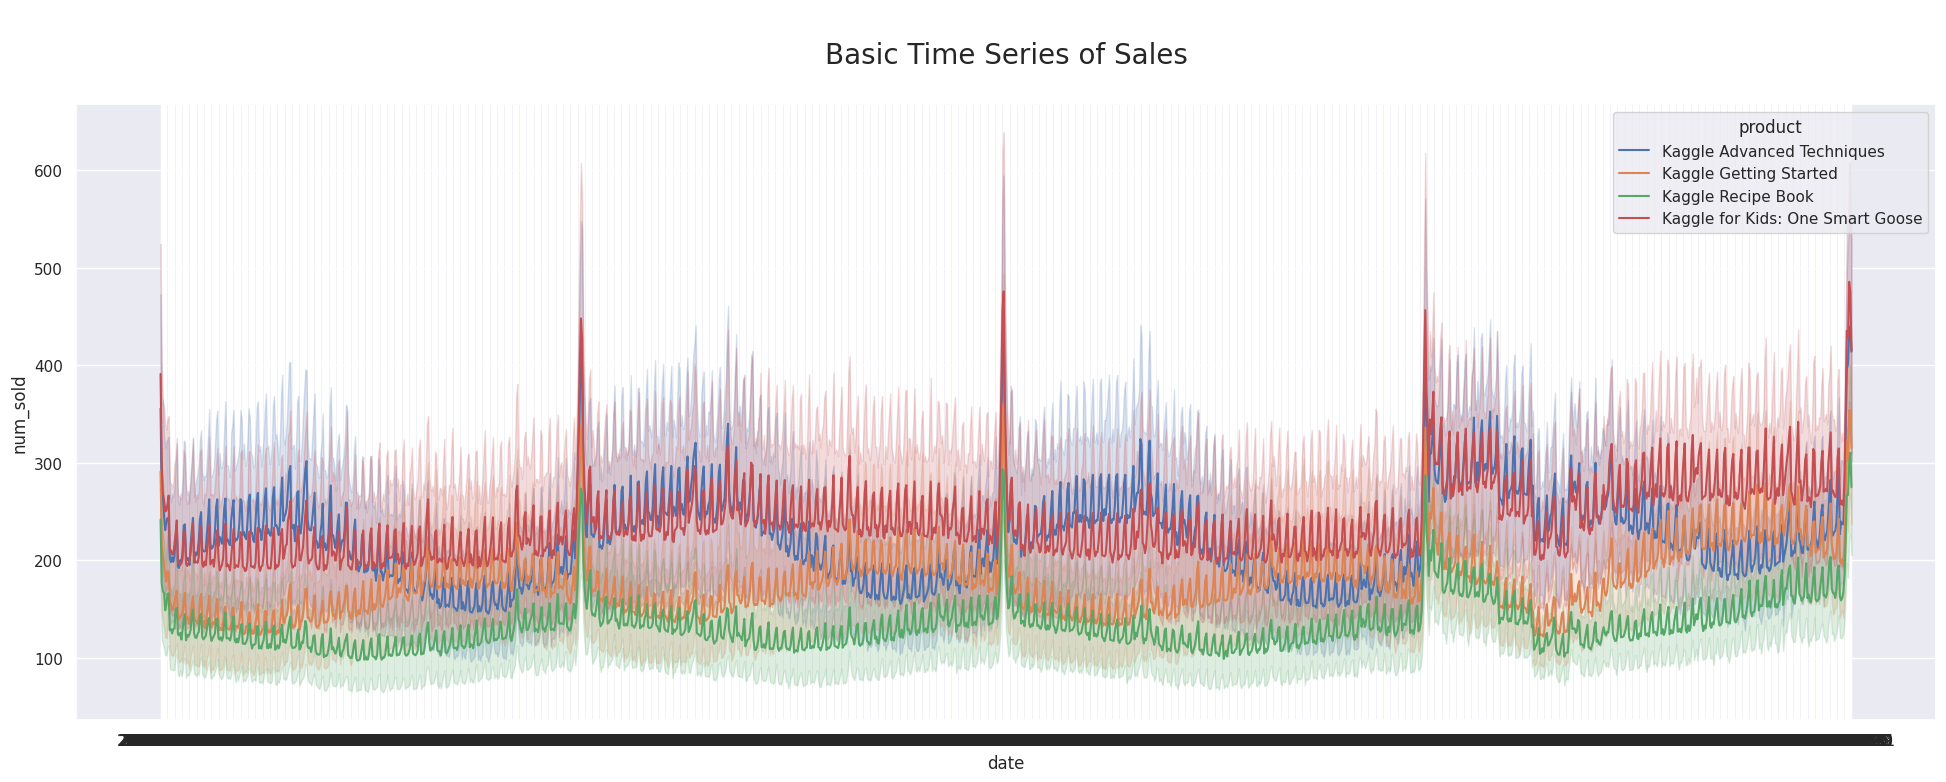

In [ ]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=train,x='date',y='num_sold',hue='product')
ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20);

## Pattern Recognition for trend
A trend is observed when there is an increasing or decreasing slope observed in the time series.

Linear Trend : Maintains a straight line.

Polynomial Trend : Shows polynomial curves.

Exponential Trend : Shows exponential growths or fall.

Log-based Trend : Shows log-based growths or fall.

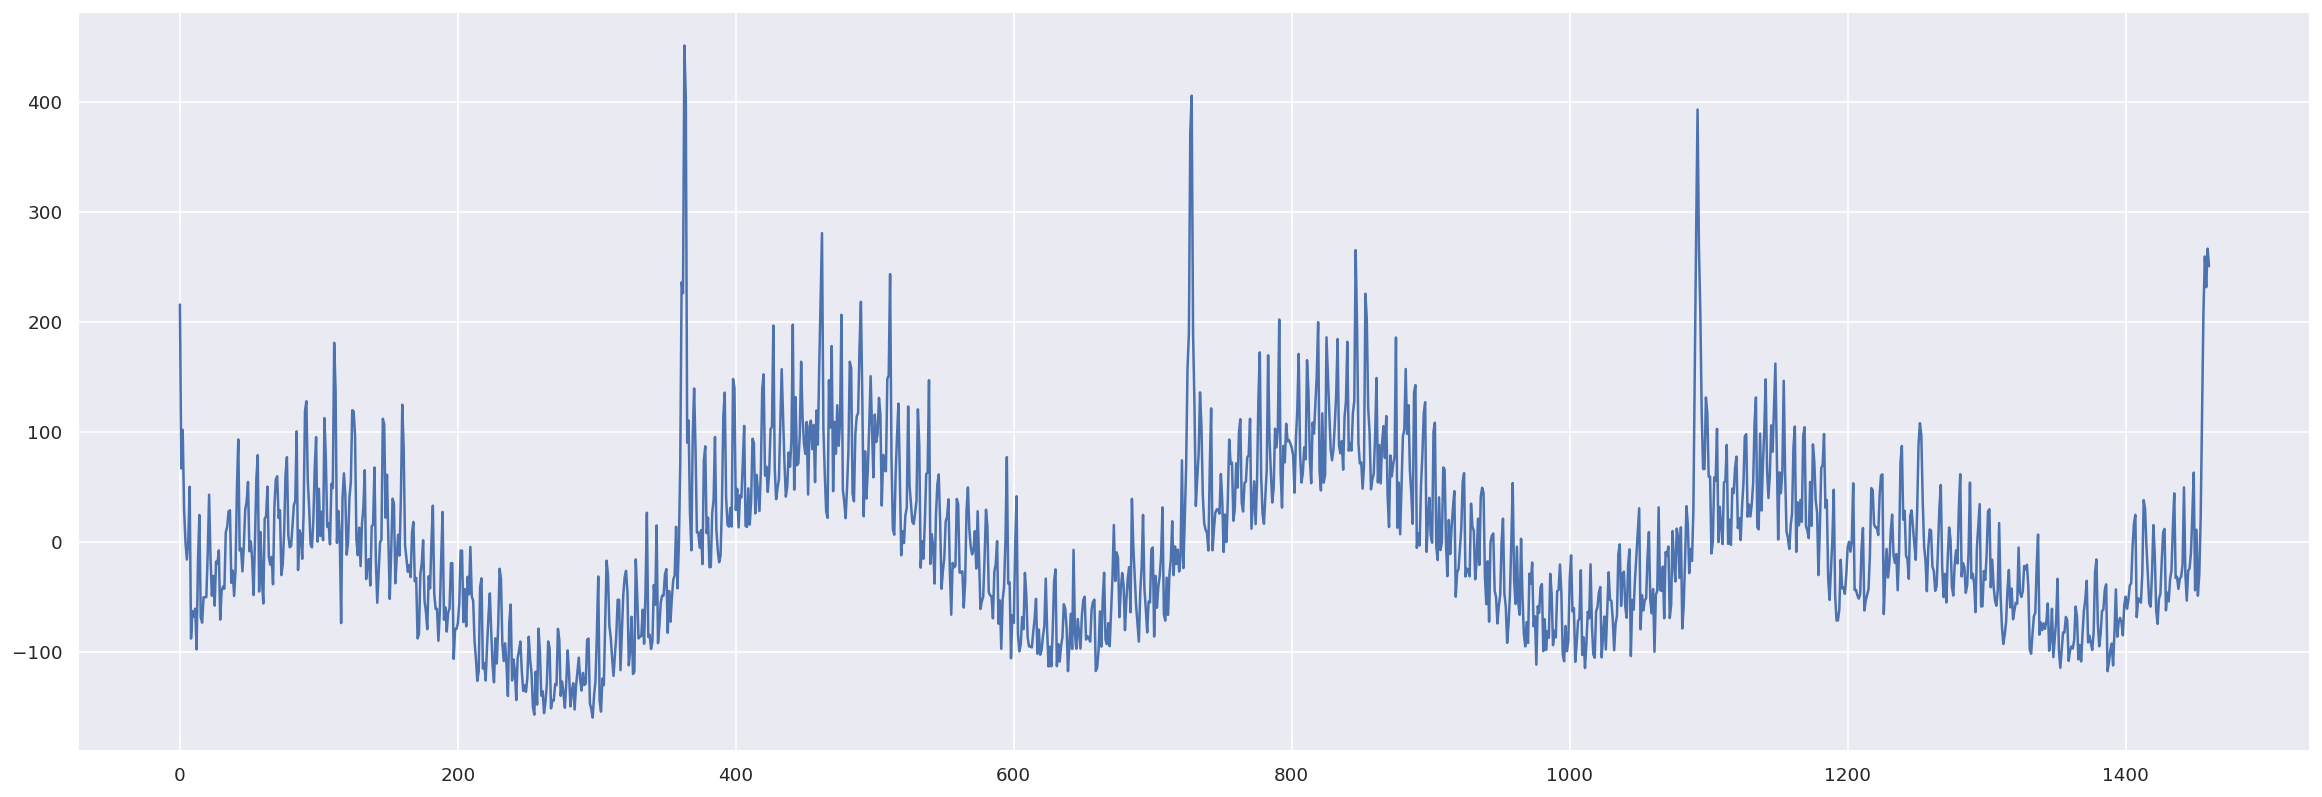

In [ ]:
from scipy import signal
df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
detrended = signal.detrend(df.num_sold.values)
plt.plot(detrended)

## **Pattern Recognition for Seasonality**
A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

Yearly : Example - Black Friday and chrismas Sales

Monthly : Example - We may find big sales on first week of the month as slalry is paid that time.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 70080
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    1461 non-null   int64 
 1   date      1461 non-null   object
 2   country   1461 non-null   object
 3   store     1461 non-null   object
 4   product   1461 non-null   object
 5   num_sold  1461 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 79.9+ KB


[]

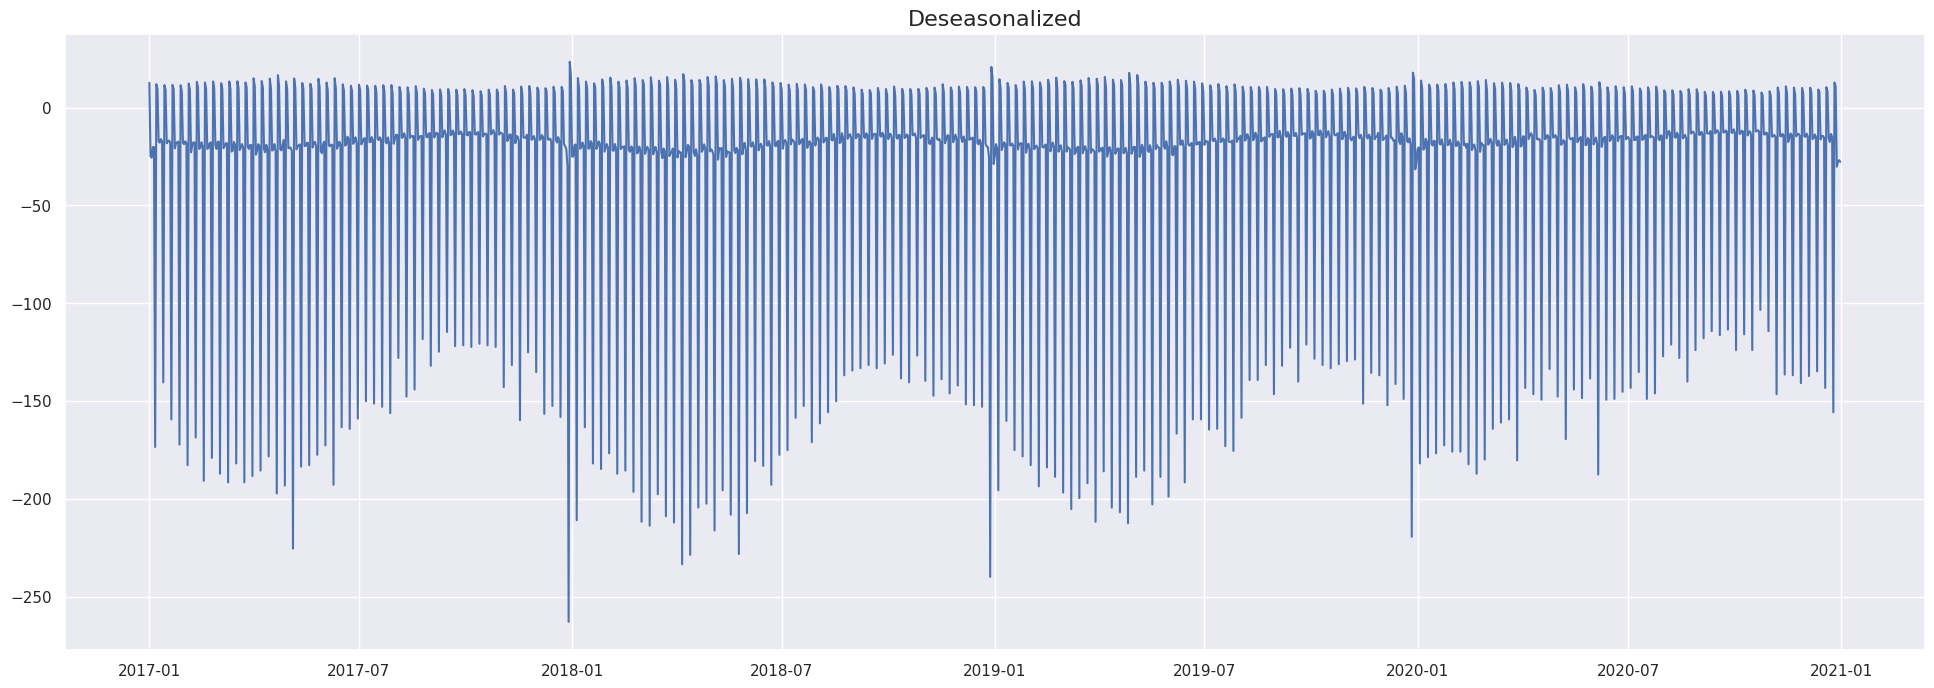

In [ ]:
df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]

df=df.set_index('date')
df.index = pd.to_datetime(df.index)

from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['num_sold'], model='addtive', extrapolate_trend='freq')
deseasonalized = df.num_sold.values / result_mul.seasonal
plt.plot(deseasonalized)
plt.title('Deseasonalized', fontsize=16)
plt.plot()

[]

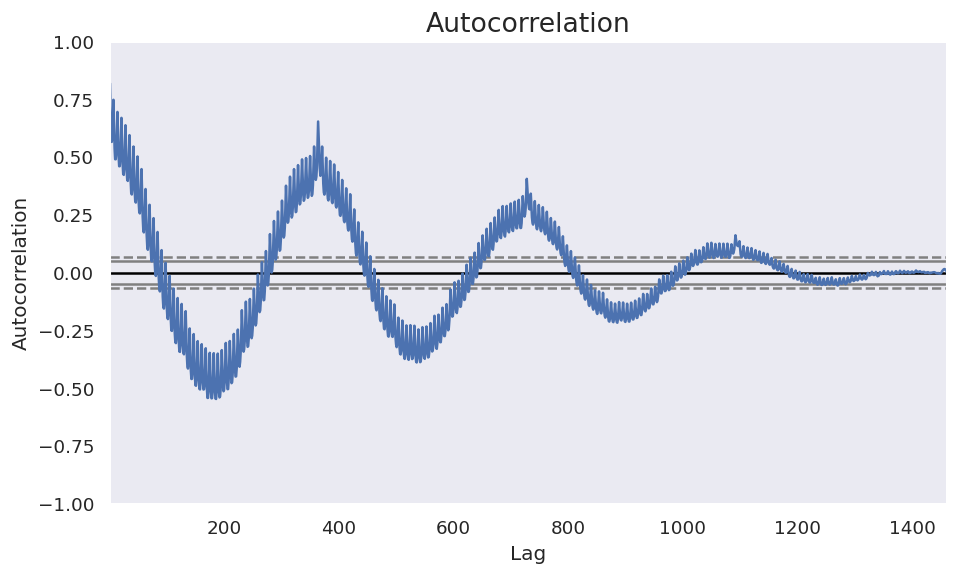

In [ ]:
from pandas.plotting import autocorrelation_plot
df = train[(train['country']=='France')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]

plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.num_sold.tolist())
plt.title('Autocorrelation', fontsize=16)
plt.plot()

## **Stationaity**
There are multiple implementations of Unit Root tests like:

Augmented Dickey Fuller test (ADH Test)

Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

Philips Perron test (PP Test)

In [ ]:
df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]

Text(0.5, 1.0, '\nSales of KaggleMart in Belgium\n')

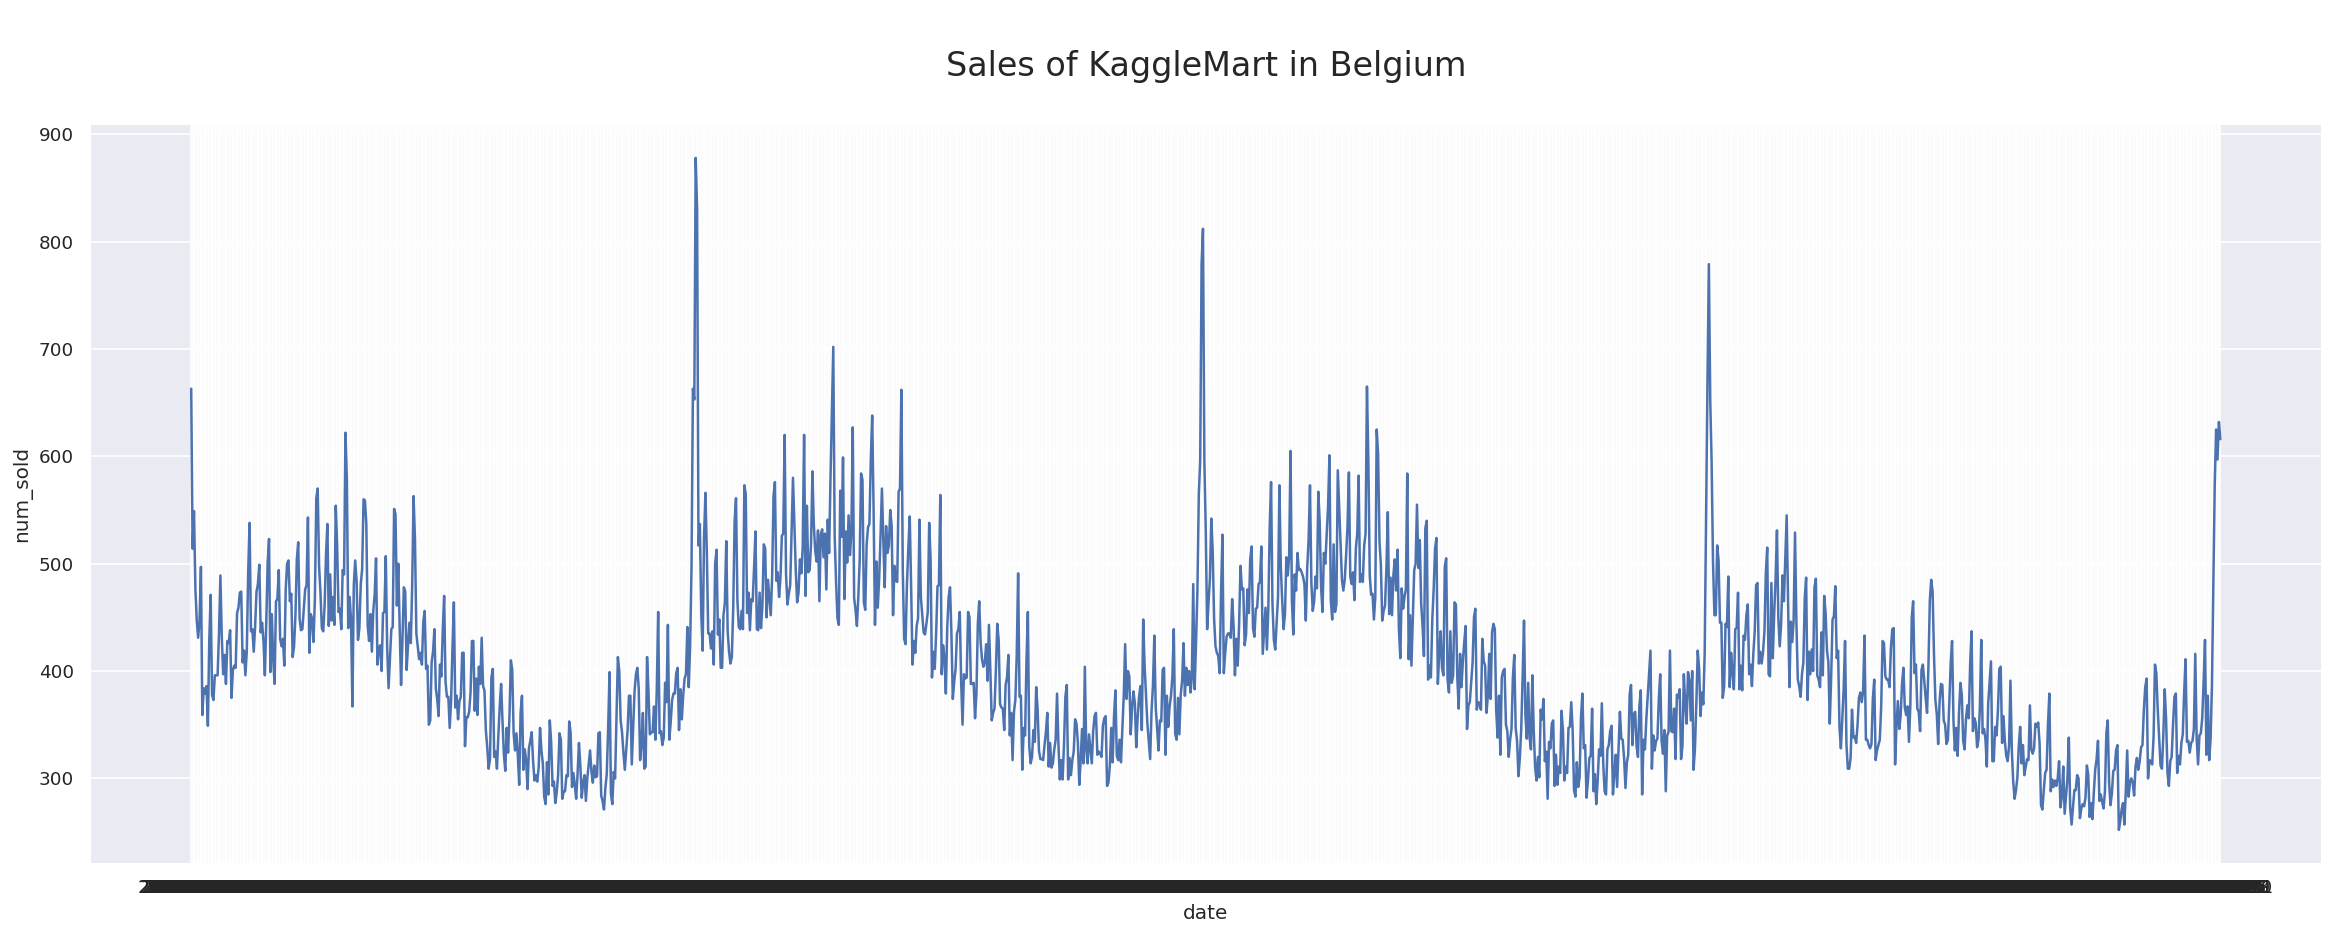

In [ ]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=df,x='date',y='num_sold')
ax.axes.set_title("\nSales of KaggleMart in Belgium\n",fontsize=20)


## **Perform Augmented Dickey Fuller test (ADH Test) for test stationaity**
Stationality - A stationary time series has statistical properties or moments (e.g., mean and variance) that do not vary in time. Stationarity, then, is the status of a stationary time series. Conversely, nonstationarity is the status of a time series whose statistical properties are changing through time.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.num_sold.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.7177853359031627
p-value: 0.07101086977865066
Critial Values:
   1%, -3.4349056408696814
Critial Values:
   5%, -2.863552005375758
Critial Values:
   10%, -2.5678411776130114


## **Autocorrelation and Partial Autocorrelation**
Autocorrelation is the correlation between two observations at different points in a time series. For example, values that are separated by an interval might have a strong positive or negative correlation.

There are 2 functions:
1. Autocorrelation Function
2. Partial Autocorrelation Function

<ipython-input-13-49c4ad2a2046>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value']=df['num_sold']


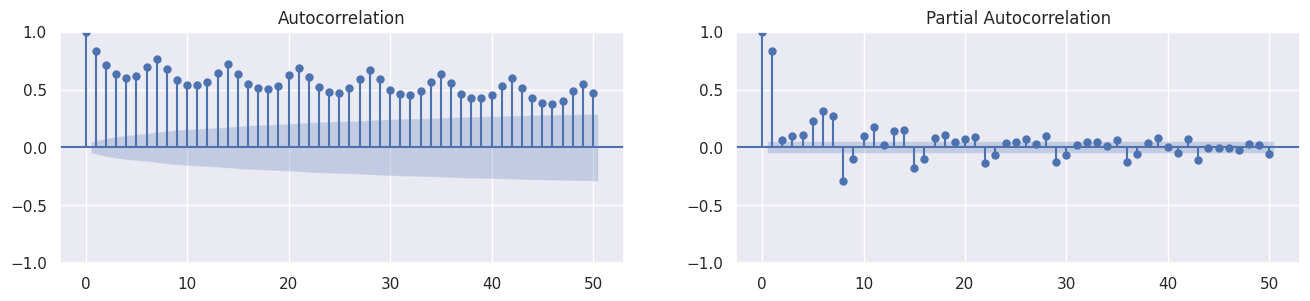

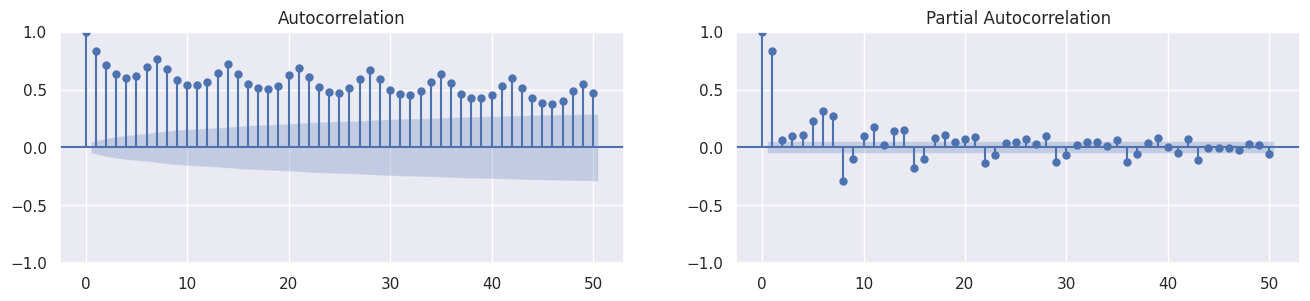

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
df['value']=df['num_sold']

acf_50 = acf(df.value, nlags=50)
pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

## **Lag Plots**
A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation.

<ipython-input-14-a743b9230cc7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss['value']=ss['num_sold']
<ipython-input-14-a743b9230cc7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a10['value']=a10['num_sold']


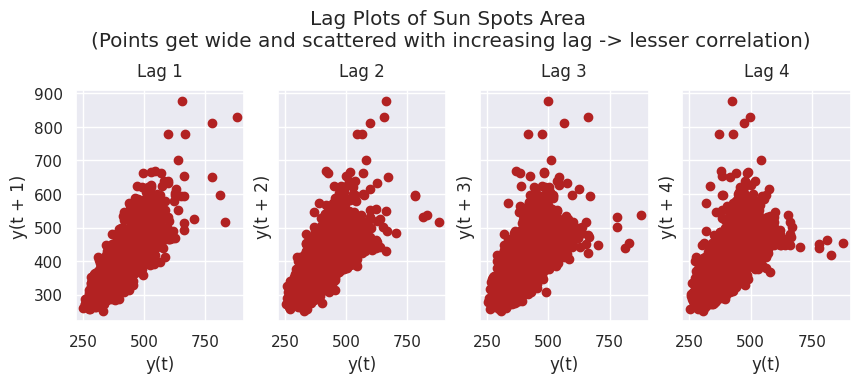

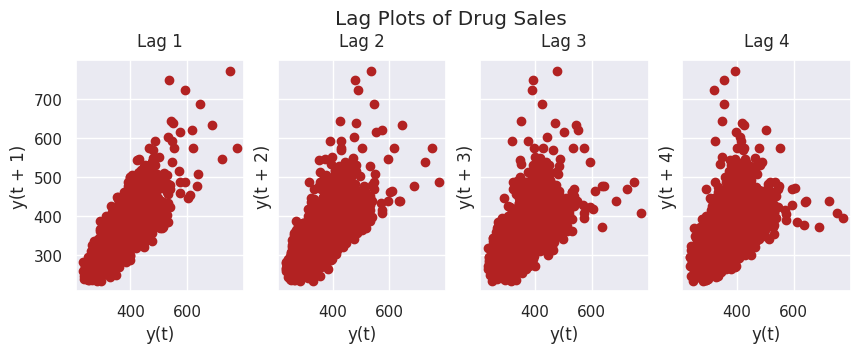

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})


ss = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
ss['value']=ss['num_sold']
a10 = train[(train['country']=='France')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
a10['value']=a10['num_sold']


fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)
plt.show()


## **Smoothing**
Smoothening of a time series may be useful in:

Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.

The smoothed version of series can be used as a feature to explain the original series itself.

Visualize the underlying trend better

<ipython-input-15-dad4560fbf21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value']=df['num_sold']


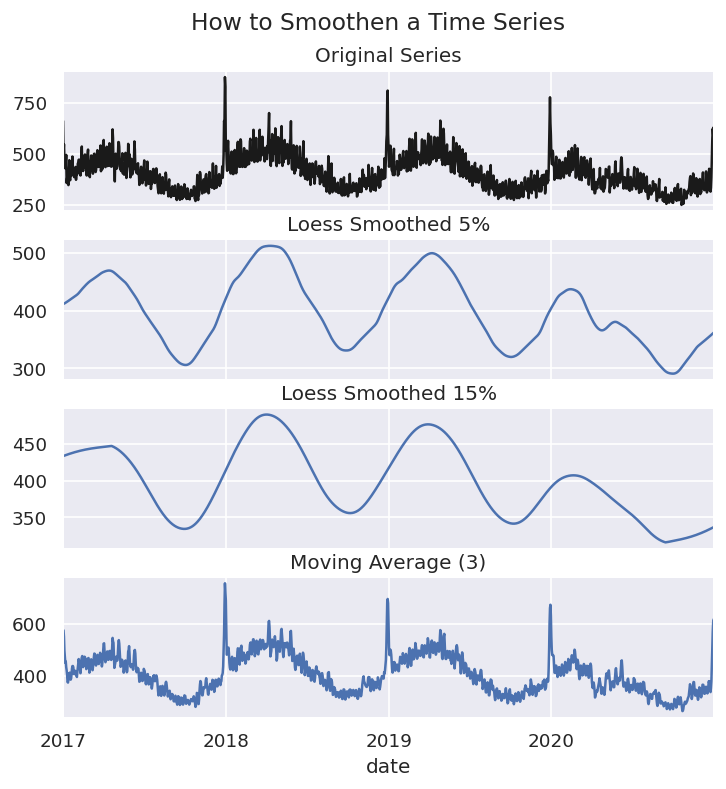

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
df['value']=df['num_sold']
df=df.set_index('date')
df.index = pd.to_datetime(df.index)

df_orig=df.copy()

df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()


df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

## **Perform ARIMA Model for Time Series Forecasting Prediction**

In [ ]:
df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
series=pd.DataFrame()
series['value']=df['num_sold']
series=series.set_index(df['date'])
series.index = pd.to_datetime(series.index)

series

,value
date,
2017-01-01,663
2017-01-02,514
2017-01-03,549
2017-01-04,477
2017-01-05,447
...,...
2020-12-27,574
2020-12-28,625
2020-12-29,597


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 1461
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7515.898
Date:                Mon, 26 Feb 2024   AIC                          15043.797
Time:                        15:37:31   BIC                          15075.514
Sample:                    01-01-2017   HQIC                         15055.628
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3193      0.020    -16.123      0.000      -0.358      -0.280
ar.L2         -0.3069      0.016    -18.621      0.000      -0.339      -0.275
ar.L3         -0.2861      0.023    -12.613      0.0

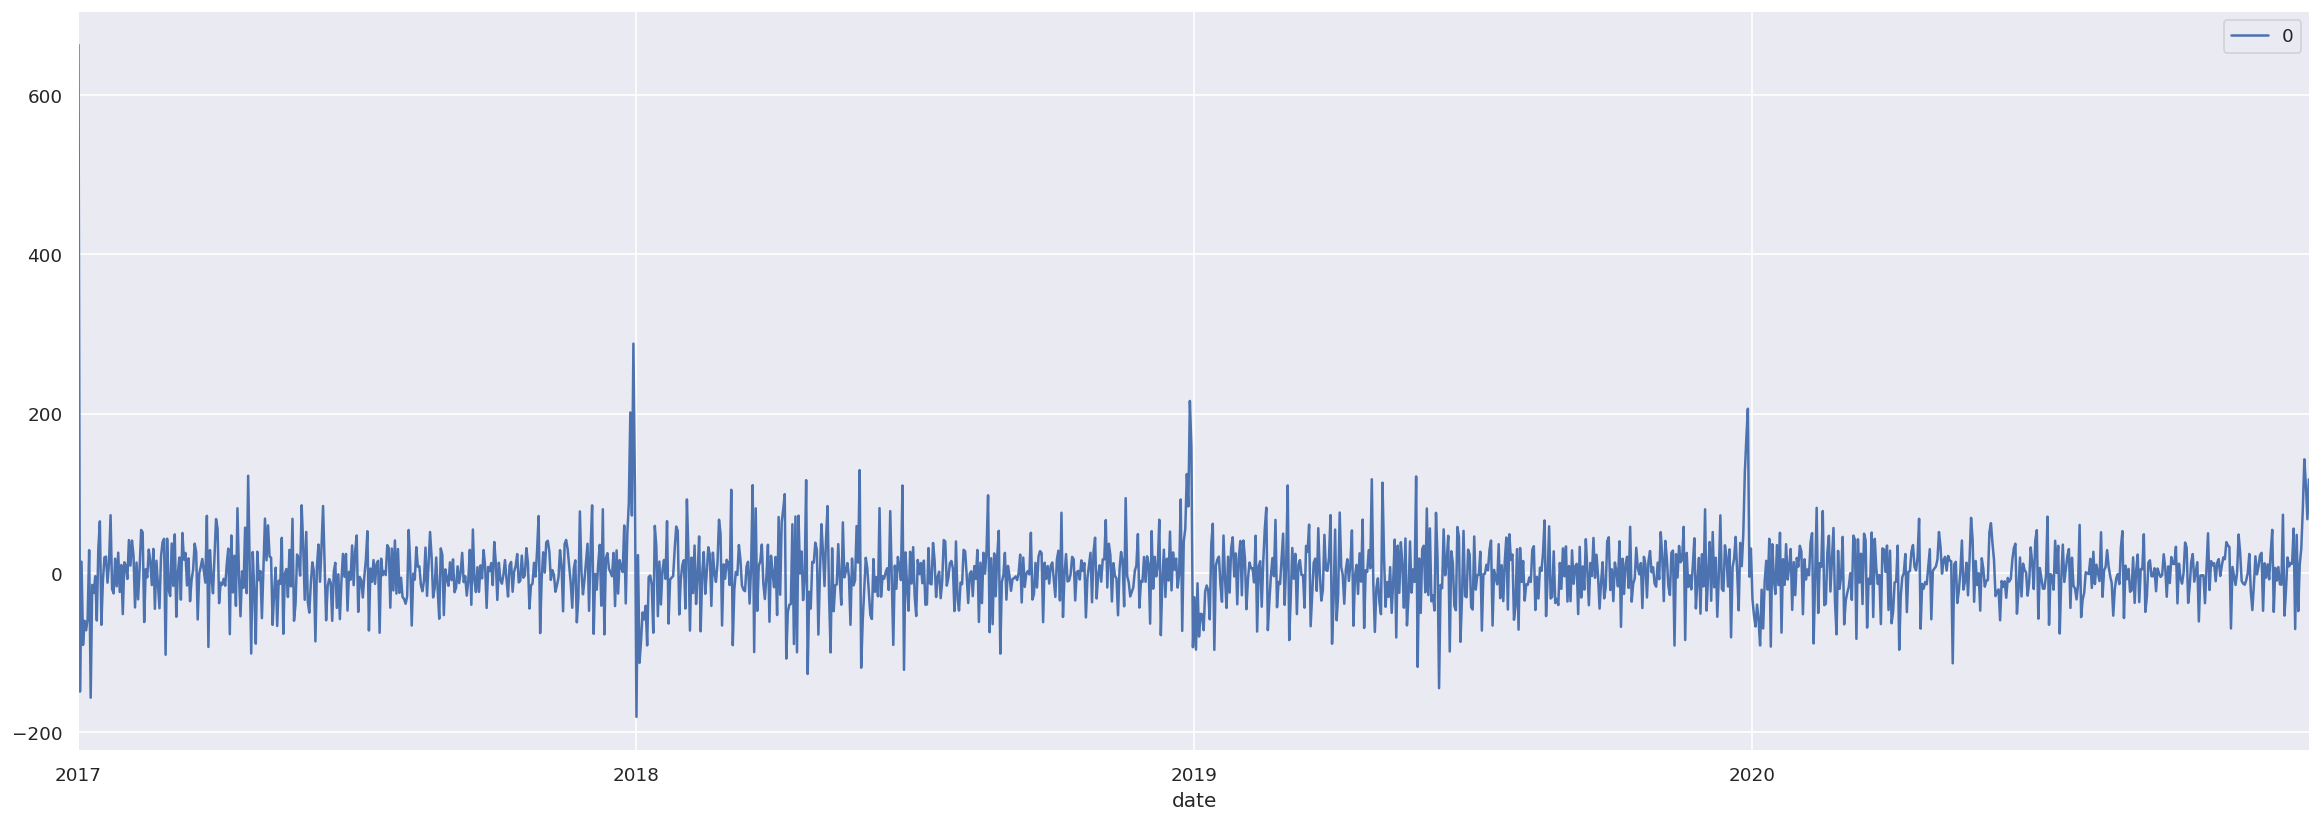

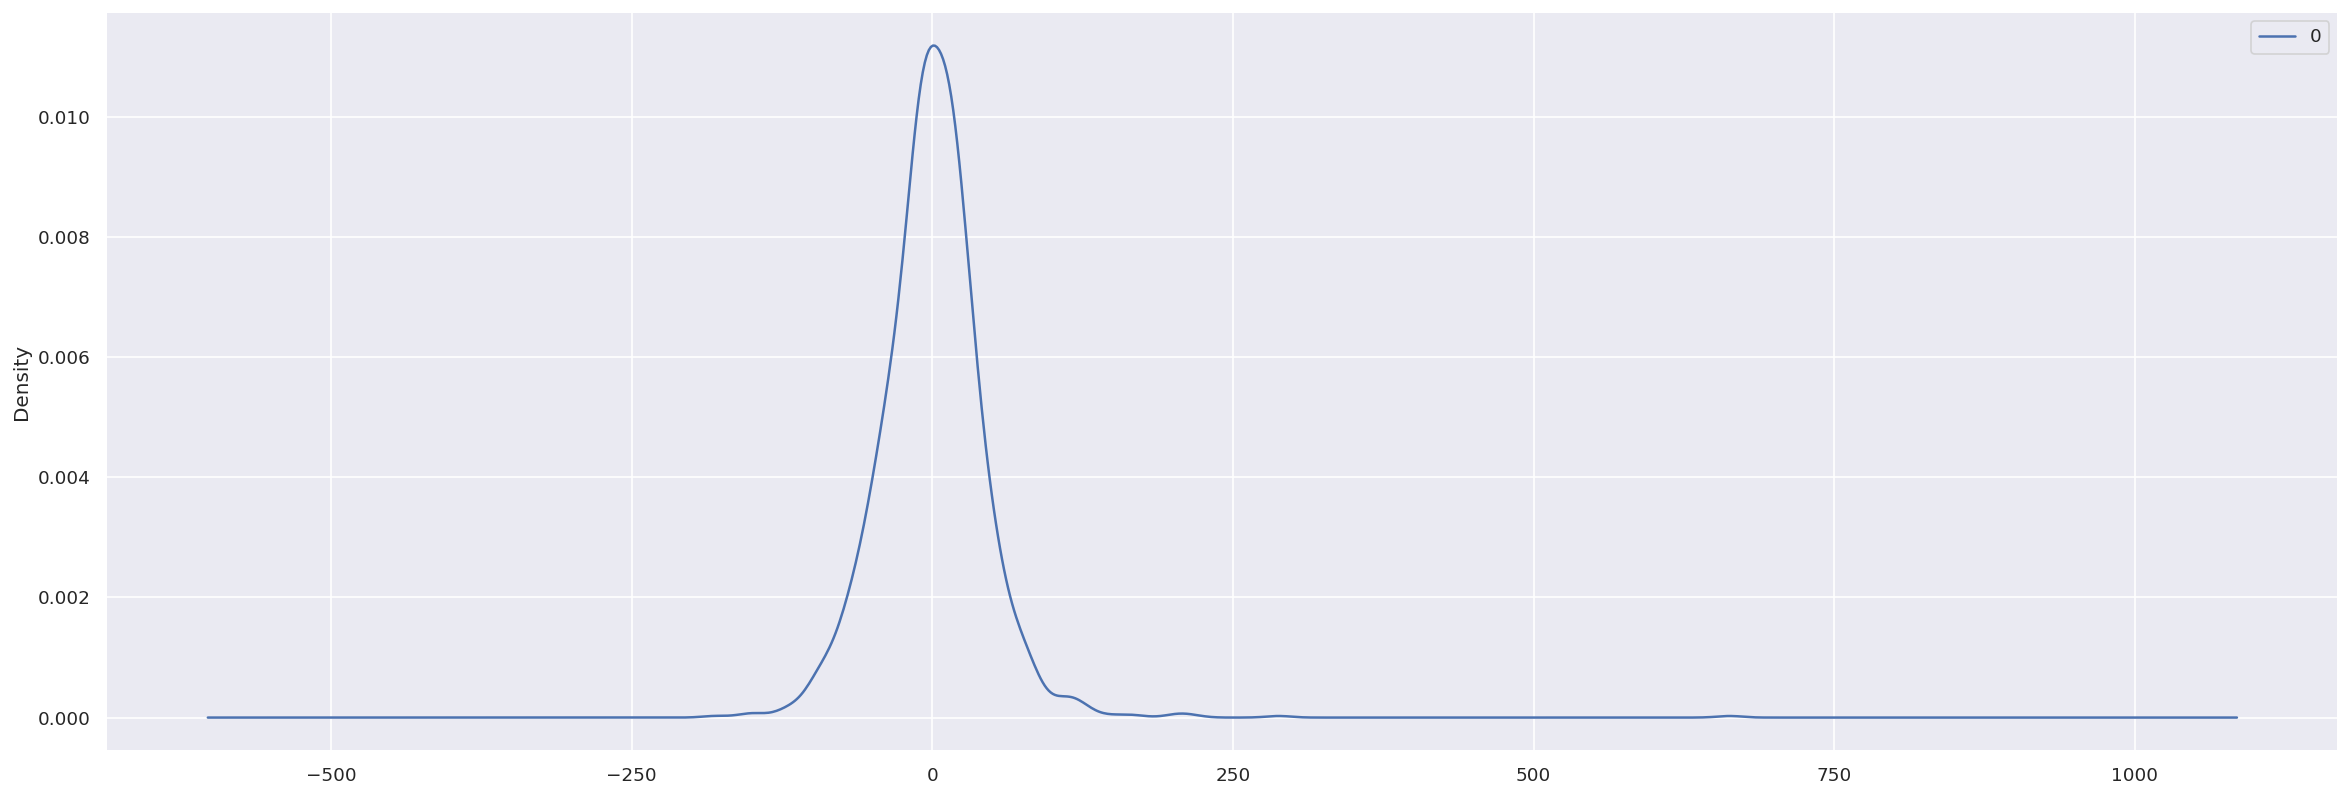

                 0
count  1461.000000
mean      0.388641
std      45.151376
min    -180.506780
25%     -23.286515
50%       0.017557
75%      23.277978
max     663.000000


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA (series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print (residuals.describe())